#### Forecasting Using FbProphet

In [1]:
#pip install prophet

In [2]:
import pandas as pd
import prophet
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df=pd.read_csv('Gold_data.csv')

In [4]:
df.head()

,date,price
0,2016-01-01,2252.60
1,2016-01-02,2454.50
2,2016-01-03,2708.10
3,2016-01-04,2577.80
4,2016-01-05,2597.75


In [5]:
df.tail()

,date,price
2177,2021-12-17,4394.4
2178,2021-12-18,4389.5
2179,2021-12-19,4389.5
2180,2021-12-20,4354.1
2181,2021-12-21,4346.5


<AxesSubplot:>

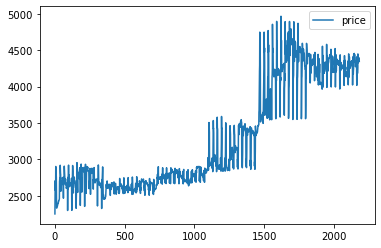

In [6]:
df.plot()

In [7]:
df.columns = ['ds','y']
df.head()

,ds,y
0,2016-01-01,2252.60
1,2016-01-02,2454.50
2,2016-01-03,2708.10
3,2016-01-04,2577.80
4,2016-01-05,2597.75


In [8]:
#df.drop(144,axis=0,inplace=True)

In [9]:
df.tail()

,ds,y
2177,2021-12-17,4394.4
2178,2021-12-18,4389.5
2179,2021-12-19,4389.5
2180,2021-12-20,4354.1
2181,2021-12-21,4346.5


In [10]:
df['ds'] = pd.to_datetime(df['ds'])

In [11]:
df.head()

,ds,y
0,2016-01-01,2252.60
1,2016-01-02,2454.50
2,2016-01-03,2708.10
3,2016-01-04,2577.80
4,2016-01-05,2597.75


In [12]:
df.tail()

,ds,y
2177,2021-12-17,4394.4
2178,2021-12-18,4389.5
2179,2021-12-19,4389.5
2180,2021-12-20,4354.1
2181,2021-12-21,4346.5


In [13]:
from prophet import Prophet

In [14]:
dir(Prophet)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_load_stan_backend',
 '_logistic_uncertainty',
 '_make_historical_mat_time',
 '_make_trend_shift_matrix',
 '_sample_uncertainty',
 'add_country_holidays',
 'add_group_component',
 'add_regressor',
 'add_seasonality',
 'construct_holiday_dataframe',
 'fit',
 'flat_growth_init',
 'flat_trend',
 'fourier_series',
 'initialize_scales',
 'linear_growth_init',
 'logistic_growth_init',
 'make_all_seasonality_features',
 'make_future_dataframe',
 'make_holiday_features',
 'make_seasonality_features',
 'parse_seasonality_args',
 'percentile',
 'piecewise_linear',
 'piecewise_logistic',
 'plot',
 'plot_components',
 'predict',
 'p

In [15]:
# Initialize the Model
model=Prophet()

In [16]:
df.columns

Index(['ds', 'y'], dtype='object')

In [17]:
df.dropna(axis=0,inplace=True)

In [18]:
df.head()

,ds,y
0,2016-01-01,2252.60
1,2016-01-02,2454.50
2,2016-01-03,2708.10
3,2016-01-04,2577.80
4,2016-01-05,2597.75


In [19]:
model.fit(df)

16:44:12 - cmdstanpy - INFO - Chain [1] start processing
16:44:12 - cmdstanpy - INFO - Chain [1] done processing


In [20]:
model.component_modes

{'additive': ['yearly',
  'weekly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [21]:
df.tail()

,ds,y
2177,2021-12-17,4394.4
2178,2021-12-18,4389.5
2179,2021-12-19,4389.5
2180,2021-12-20,4354.1
2181,2021-12-21,4346.5


In [22]:
### Create future dates of 365 days
future_dates=model.make_future_dataframe(periods=365)

In [23]:
future_dates.tail()

,ds
2542,2022-12-17
2543,2022-12-18
2544,2022-12-19
2545,2022-12-20
2546,2022-12-21


In [24]:
prediction=model.predict(future_dates)

In [25]:
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-01-01,2592.001363,2403.485679,2834.763383,2592.001363,2592.001363,30.892337,30.892337,30.892337,-3.691300,-3.691300,-3.691300,34.583637,34.583637,34.583637,0.0,0.0,0.0,2622.893700
1,2016-01-02,2592.747793,2417.335318,2835.121976,2592.747793,2592.747793,40.465145,40.465145,40.465145,1.162211,1.162211,1.162211,39.302933,39.302933,39.302933,0.0,0.0,0.0,2633.212938
2,2016-01-03,2593.494223,2410.489844,2855.964539,2593.494223,2593.494223,41.635867,41.635867,41.635867,-1.388516,-1.388516,-1.388516,43.024384,43.024384,43.024384,0.0,0.0,0.0,2635.130090
3,2016-01-04,2594.240652,2431.660426,2852.924804,2594.240652,2594.240652,45.908339,45.908339,45.908339,0.188308,0.188308,0.188308,45.720031,45.720031,45.720031,0.0,0.0,0.0,2640.148992
4,2016-01-05,2594.987082,2434.877643,2855.429256,2594.987082,2594.987082,48.561401,48.561401,48.561401,1.178934,1.178934,1.178934,47.382467,47.382467,47.382467,0.0,0.0,0.0,2643.548483


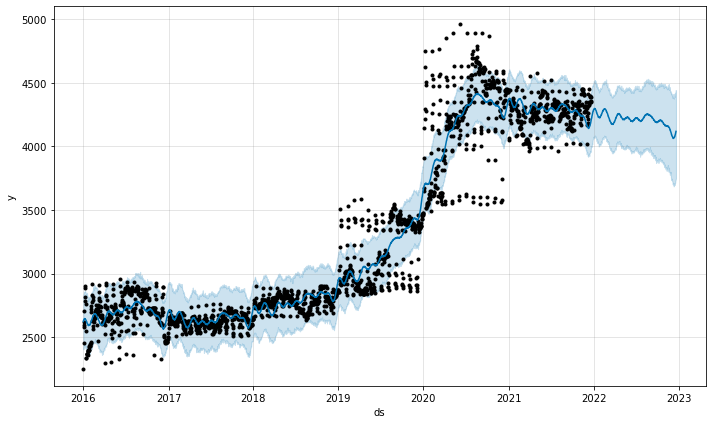

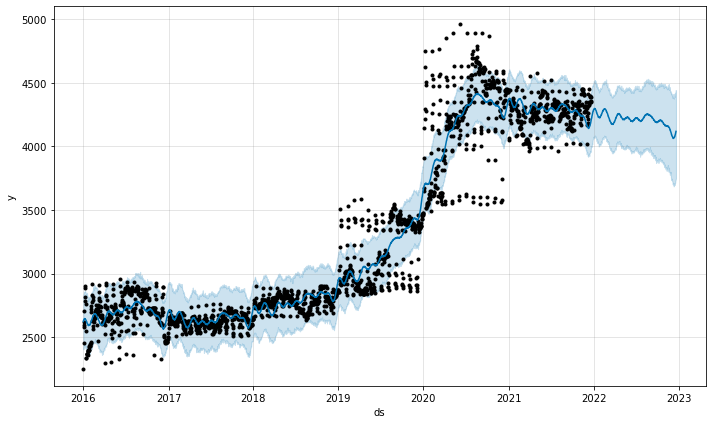

In [26]:
### plot the predicted projection
model.plot(prediction)

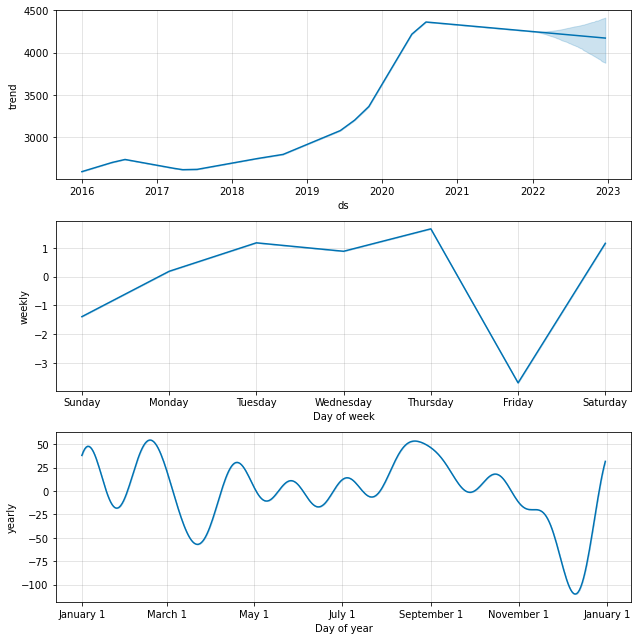

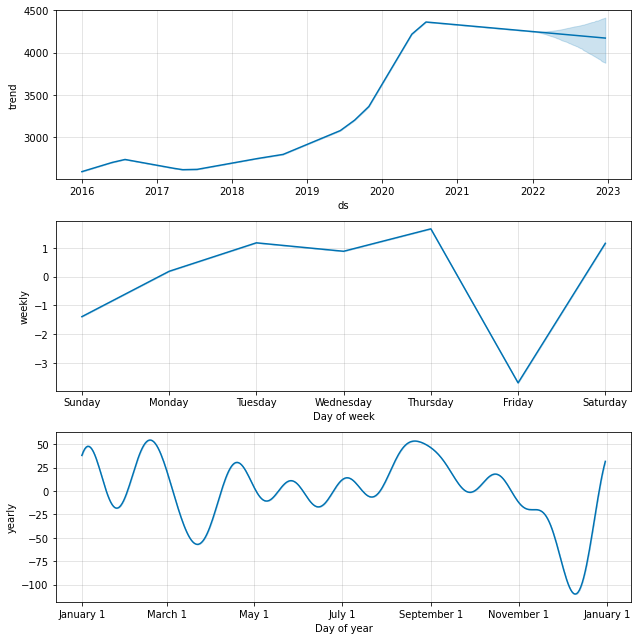

In [27]:
#### Visualize Each Components[Trends,yearly]
model.plot_components(prediction)

Time Series Analysis

1960-1962
Cross Validation
1960-61---Train dataset
1961-62--Test dataset
1962-63---Validation


In [28]:
df.head()

,ds,y
0,2016-01-01,2252.60
1,2016-01-02,2454.50
2,2016-01-03,2708.10
3,2016-01-04,2577.80
4,2016-01-05,2597.75


In [29]:
from prophet.diagnostics import cross_validation
df_cv = cross_validation(model, initial='1800 days', period='356 days', horizon = '100 days')
df_cv.head()

  0%|          | 0/1 [00:00<?, ?it/s]

16:44:17 - cmdstanpy - INFO - Chain [1] start processing
16:44:19 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2021-09-13,4258.723817,4032.232337,4478.073095,4235.7,2021-09-12
1,2021-09-14,4258.471232,4040.872045,4475.312958,4268.9,2021-09-12
2,2021-09-15,4257.050343,4025.836041,4459.838249,4230.7,2021-09-12
3,2021-09-16,4255.264724,4038.464831,4465.074633,4141.4,2021-09-12
4,2021-09-17,4248.064436,4048.737325,4480.778315,4142.1,2021-09-12


In [30]:
df_cv.tail()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
95,2021-12-17,4069.321547,3847.934269,4287.863069,4394.4,2021-09-12
96,2021-12-18,4080.145993,3846.191262,4295.982783,4389.5,2021-09-12
97,2021-12-19,4087.109667,3867.617962,4297.985095,4389.5,2021-09-12
98,2021-12-20,4097.105563,3870.797321,4321.243812,4354.1,2021-09-12
99,2021-12-21,4108.655228,3888.764725,4342.637553,4346.5,2021-09-12


In [31]:
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,10 days,5299.942259,72.800702,63.214345,0.015179,0.014420,0.015028,1.0
1,11 days,6159.114515,78.480026,70.462784,0.016941,0.019580,0.016765,1.0
2,12 days,6993.836572,83.629161,78.615548,0.018919,0.022438,0.018718,1.0
3,13 days,7628.721026,87.342550,84.372882,0.020319,0.022438,0.020100,1.0
4,14 days,6976.140779,83.523295,81.010980,0.019505,0.021226,0.019304,1.0


In [32]:
df_p.tail()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
86,96 days,79881.042144,282.632344,272.161038,0.062596,0.066012,0.064769,0.3
87,97 days,87782.649884,296.281369,290.179851,0.066555,0.067581,0.068937,0.2
88,98 days,94083.290608,306.729996,303.556647,0.069447,0.068980,0.071994,0.1
89,99 days,95858.471699,309.610193,307.280120,0.070196,0.068980,0.072786,0.0
90,100 days,85456.168367,292.328870,290.990519,0.066661,0.067491,0.068980,0.0


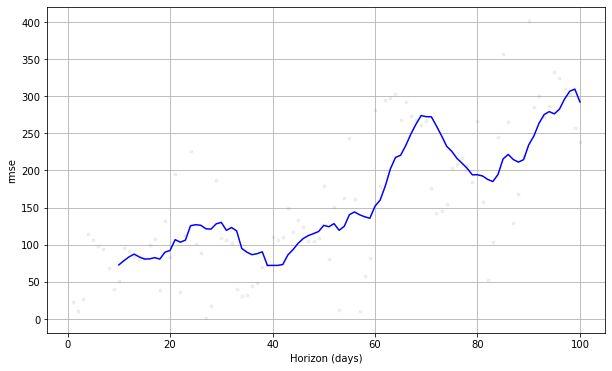

In [33]:
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='rmse')

In [34]:
import pickle 

In [35]:
with open('model.pkl','wb') as f:
    pickle.dump(model,f)

In [36]:
with open('model.pkl', 'rb') as f:
    clf2 = pickle.load(f)